In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import chart_studio.plotly as py
import plotly.graph_objs as go

#for offline plotting

import plotly.offline as py
from plotly.offline import plot
from plotly.graph_objs import Scatter
py.init_notebook_mode(connected=True)

In [36]:
tesla = pd.read_csv('tesla.csv')
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [37]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [38]:
tesla['Date'] = pd.to_datetime(tesla['Date'])

C:\Users\hp\AppData\Local\Temp\ipykernel_3828\3702129700.py:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [39]:
print(f'Dataframe contains stock prices between {tesla.Date.min()} {tesla.Date.max()}')
print(f'Total days = {(tesla.Date.max()  - tesla.Date.min()).days}days')

Dataframe contains stock prices between 2010-01-07 00:00:00 2019-12-03 00:00:00
Total days = 3617days


In [40]:
tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
std,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07


<Axes: >

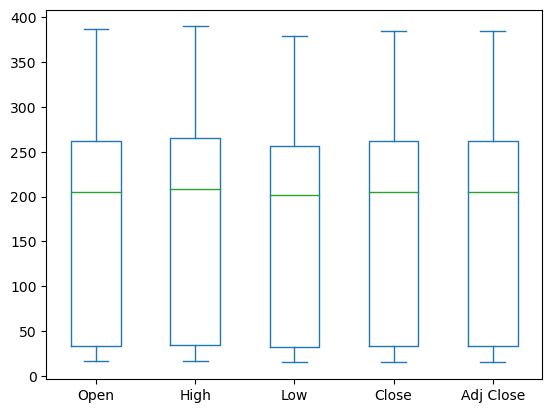

In [41]:
tesla[['Open','High','Low','Close','Adj Close']].plot(kind = 'box')

In [42]:
# Setting the layout for our plot
layout = go.Layout(
    title='Stock Prices of Tesla',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

tesla_data = [{'x':tesla['Date'], 'y':tesla['Close']}]
plot = go.Figure(data=tesla_data, layout=layout)

In [43]:
#plot(plot) #plotting offline
iplot(plot)

In [45]:
# Bulding the regression model
from sklearn.model_selection import train_test_split

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [46]:
#Split the data into train and test sets
X = np.array(tesla.index).reshape(-1,1)
Y = tesla['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)


In [47]:
#Feature Scaling
scaler = StandardScaler().fit(X_train)

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
#creating a linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [52]:
#Plot actual and predicted values for train dataset
trace0 = go.Scatter(
     x = X_train.T[0],
     y = Y_train,
     mode = 'markers',
     name = 'Actual'
)
trace1 = go.Scatter(
     x = X_train.T[0],
     y = lm.predict(X_train).T,
     mode = 'lines',
     name = 'Predicted'
)
tesla_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=tesla_data, layout=layout)

In [53]:
iplot(plot2)

In [55]:
#Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.8658871776828707	0.8610649253244576
MSE       1821.3833862936174	1780.9875394188446



# LSTM Model

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [58]:
data = pd.read_csv("Google_train_data.csv")

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [60]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [62]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [63]:
X_train = []
y_train = []
for i in range (60,1149): #60 : timestep // 1149 : Length of the data
    X_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])
    
X_train,y_train = np.array(X_train),np.array(y_train)

In [64]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))  #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [65]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [66]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 21s - loss: 0.0400 - 21s/epoch - 600ms/step
Epoch 2/20
35/35 - 8s - loss: 0.0120 - 8s/epoch - 230ms/step
Epoch 3/20
35/35 - 8s - loss: 0.0093 - 8s/epoch - 228ms/step
Epoch 4/20
35/35 - 8s - loss: 0.0078 - 8s/epoch - 231ms/step
Epoch 5/20
35/35 - 8s - loss: 0.0077 - 8s/epoch - 228ms/step
Epoch 6/20
35/35 - 8s - loss: 0.0083 - 8s/epoch - 227ms/step
Epoch 7/20
35/35 - 8s - loss: 0.0070 - 8s/epoch - 240ms/step
Epoch 8/20
35/35 - 8s - loss: 0.0068 - 8s/epoch - 228ms/step
Epoch 9/20
35/35 - 8s - loss: 0.0063 - 8s/epoch - 228ms/step
Epoch 10/20
35/35 - 8s - loss: 0.0070 - 8s/epoch - 230ms/step
Epoch 11/20
35/35 - 8s - loss: 0.0056 - 8s/epoch - 227ms/step
Epoch 12/20
35/35 - 8s - loss: 0.0058 - 8s/epoch - 231ms/step
Epoch 13/20
35/35 - 8s - loss: 0.0051 - 8s/epoch - 241ms/step
Epoch 14/20
35/35 - 8s - loss: 0.0056 - 8s/epoch - 230ms/step
Epoch 15/20
35/35 - 8s - loss: 0.0054 - 8s/epoch - 226ms/step
Epoch 16/20
35/35 - 5s - loss: 0.0107 - 5s/epoch - 130ms/step
Epoch 17/20
35/

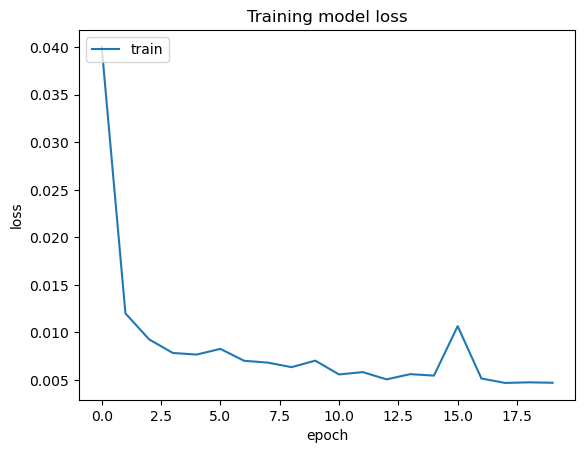

In [67]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [68]:
testData = pd.read_csv('Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values
#input array for the model
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [69]:
y_pred = model.predict(X_test)
y_pred

6/6 [==============================] - 2s 37ms/step


array([[1.0795517],
       [1.0823449],
       [1.09418  ],
       [1.111275 ],
       [1.1235394],
       [1.1203779],
       [1.1039116],
       [1.0840063],
       [1.0730351],
       [1.0721449],
       [1.0671501],
       [1.0570512],
       [1.0482473],
       [1.0403268],
       [1.0401775],
       [1.0465053],
       [1.0664487],
       [1.0957476],
       [1.1271597],
       [1.1563656],
       [1.1636947],
       [1.1544921],
       [1.1291621],
       [1.0975815],
       [1.0722116],
       [1.0609502],
       [1.0621692],
       [1.0655925],
       [1.060277 ],
       [1.050219 ],
       [1.038898 ],
       [1.02612  ],
       [1.0065925],
       [0.9828177],
       [0.9759281],
       [0.989791 ],
       [1.0150455],
       [1.040894 ],
       [1.0630469],
       [1.0713284],
       [1.0800397],
       [1.0921798],
       [1.1072885],
       [1.1211576],
       [1.1294224],
       [1.1278031],
       [1.1151862],
       [1.1053007],
       [1.1036742],
       [1.1112399],


In [70]:
predicted_price = sc.inverse_transform(y_pred)

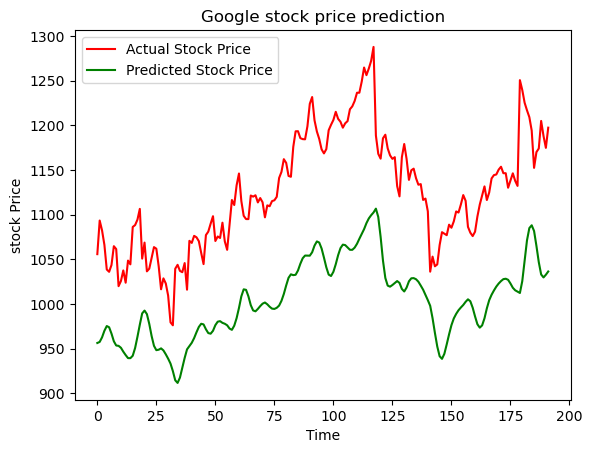

In [71]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('stock Price')
plt.legend()
plt.show()